Found 2062 images belonging to 2 classes.
Found 514 images belonging to 2 classes.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    51,380,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,751,553 (197.42 MB)

 Trainable params: 51,751,553 (197.42 MB)

 Non-trainable params: 0 (0.00 B)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.5799 - loss: 2.2387 - val_accuracy: 0.9066 - val_loss: 0.2473
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 231s 4s/step - accuracy: 0.8964 - loss: 0.2795 - val_accuracy: 0.8735 - val_loss: 0.2973
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.9350 - loss: 0.1794 - val_accuracy: 0.8696 - val_loss: 0.3531
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 307s 5s/step - accuracy: 0.8931 - loss: 0.2539 - val_accuracy: 0.9202 - val_loss: 0.2101
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 333s 5s/step - accuracy: 0.9392 - loss: 0.1647 - val_accuracy: 0.9027 - val_loss: 0.2548
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 295s 5s/step - accuracy: 0.9623 - loss: 0.1002 - val_accuracy: 0.9280 - val_loss: 0.2212
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 350s 5s/step - accuracy: 0.9752 - loss: 0.0657 - val_accuracy: 0.9397 - val_loss: 0.1706
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 422s 7s/step - accuracy: 0.9810 - loss: 0.0600 - val_accuracy: 0.9397 - v

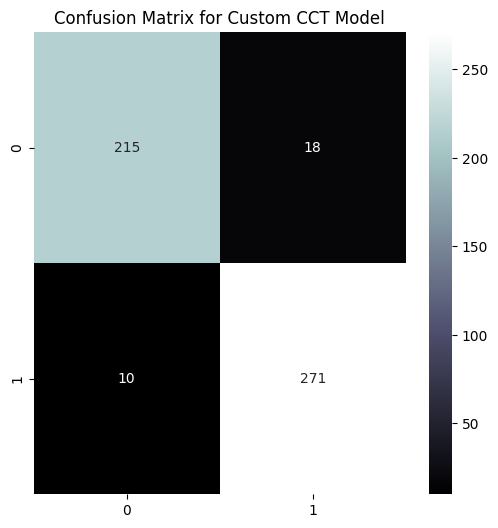

Classification Report for Custom CCT Model:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       233
           1       0.94      0.96      0.95       281

    accuracy                           0.95       514
   macro avg       0.95      0.94      0.94       514
weighted avg       0.95      0.95      0.95       514



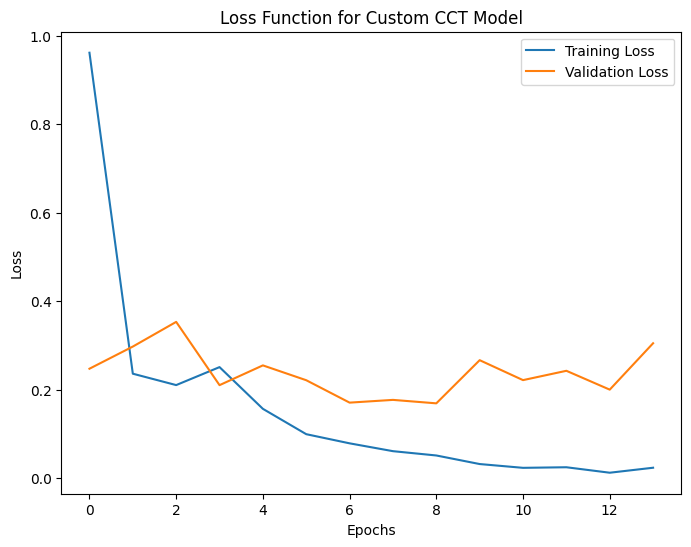

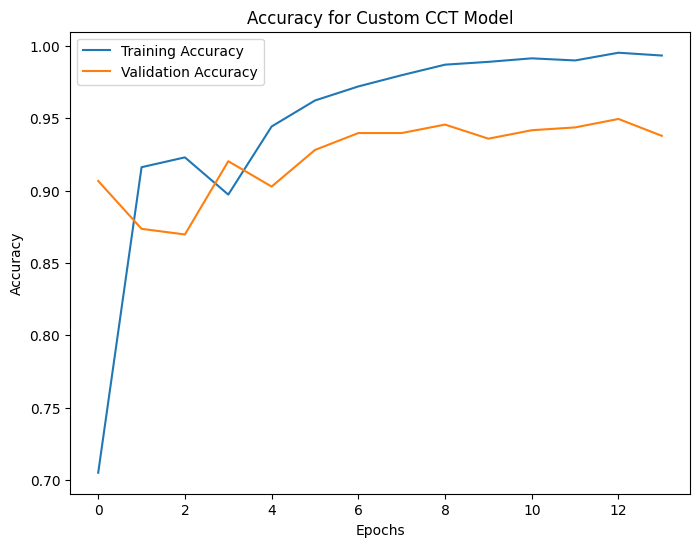

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Paths
normal_path = 'dataset/normal'
potholes_path = 'dataset/potholes'

early_stopping = EarlyStopping(
    monitor='val_loss',    # Monitors validation loss
    patience=5,            # Stops training if no improvement in 5 epochs
    restore_best_weights=True  # Restores the best model weights
)

# Image preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_gen = datagen.flow_from_directory('dataset/',
                                        target_size=(224, 224),
                                        batch_size=32,
                                        class_mode='binary',
                                        subset='training',
                                        shuffle=True)

val_gen = datagen.flow_from_directory('dataset/',
                                      target_size=(224, 224),
                                      batch_size=32,
                                      class_mode='binary',
                                      subset='validation',
                                      shuffle=False)

# Define a custom CCT model using Keras
def create_custom_cct_model():
    inputs = tf.keras.Input(shape=(224, 224, 3))
    
    # Convolutional layers to extract local features
    x = tf.keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu")(inputs)
    x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
    
    x = tf.keras.layers.Conv2D(128, kernel_size=3, padding="same", activation="relu")(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
    
    x = tf.keras.layers.Conv2D(256, kernel_size=3, padding="same", activation="relu")(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
    
    # Flatten and dense layers for classification
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    
    # Output layer
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    
    # Create model
    model = tf.keras.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Build and compile the CCT model
custom_cct_model = create_custom_cct_model()

# Model summary
custom_cct_model.summary()

# Train the model
history = custom_cct_model.fit(train_gen, validation_data=val_gen, epochs=20,callbacks=[early_stopping])

# Predictions
val_pred = custom_cct_model.predict(val_gen)
val_pred_labels = (val_pred > 0.5).astype(int)
y_true = val_gen.classes

# Confusion Matrix and Classification Report
cm = confusion_matrix(y_true, val_pred_labels)
cr = classification_report(y_true, val_pred_labels)

# Plot Confusion Matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='bone')
plt.title('Confusion Matrix for Custom CCT Model')
plt.show()

# Print classification report
print(f"Classification Report for Custom CCT Model:\n{cr}")

# Plot Loss Function Graph
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Function for Custom CCT Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Accuracy Graph
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy for Custom CCT Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [5]:
custom_cct_model.save("Pothole-Custom.h5")

import zipfile

with zipfile.ZipFile("Pothole-Custom.zip", "w", zipfile.ZIP_DEFLATED) as zipf:
    zipf.write("Pothole-Custom.h5")


In [4]:
custom_cct_model.save('Pothole-Custom-NoOpt.h5', include_optimizer=False)
